<a href="https://colab.research.google.com/github/Dhawal-Modi/DSC_2024_Space_Jam/blob/bhoomika/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
mitbih_test = pd.read_csv('mitbih_test.csv', header= None)
mitbih_train = pd.read_csv('mitbih_train.csv', header = None)

In [143]:
mitbih_test.info()
mitbih_test = mitbih_test.rename(columns={'187': 'labels'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [144]:
mitbih_train.info()
mitbih_train = mitbih_train.rename(columns={'187': 'labels'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [145]:
df_test = pd.DataFrame(mitbih_test)
df_test = df_test.rename(columns ={187 : 'label'})
df_test
df_test.label.unique()

array([0., 1., 2., 3., 4.])

In [146]:
df_train = pd.DataFrame(mitbih_train)
df_train = df_train.rename(columns ={187 : 'label'})
df_train
df_train.label.unique()

array([0., 1., 2., 3., 4.])

In [147]:
print("This is Normal:", df_train['label'].value_counts()[0])
print("This is 1:", df_train['label'].value_counts()[1])
print("This is 2:", df_train['label'].value_counts()[2])
print("This is 3:", df_train['label'].value_counts()[3])
print("This is 4:", df_train['label'].value_counts()[4])

This is Normal: 72471
This is 1: 2223
This is 2: 5788
This is 3: 641
This is 4: 6431


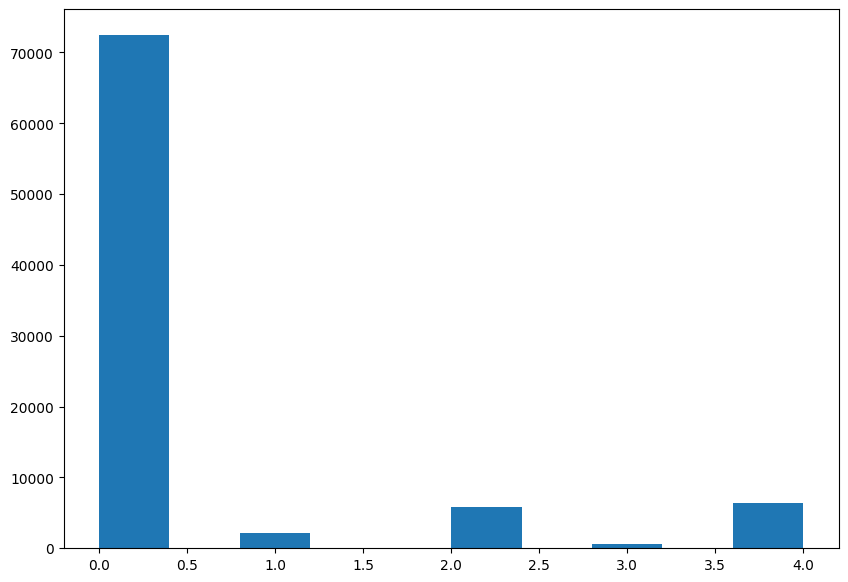

In [148]:
plt.figure(figsize=(10, 7))
plt.hist(df_train['label'])
plt.show()

In [149]:
df_normal = df_train[df_train['label'] == 0]
df_one = df_train[df_train['label'] == 1]
df_two = df_train[df_train['label'] == 2]
df_three = df_train[df_train['label'] == 3]
df_four = df_train[df_train['label'] == 4]

In [150]:
import random
df_normal = df_normal.sample(n=1200, random_state=1)
df_one = df_one.sample(n=1200, random_state=1)
df_two = df_two.sample(n=1200, random_state=1)
df_four = df_four.sample(n=1200, random_state=1)

df_train_normalized = pd.concat([df_normal, df_one, df_two, df_three, df_four])

In [151]:
df_train_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5441 entries, 65728 to 85105
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 7.8 MB


In [163]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 31.4 MB


In [162]:
df_downsampled_test = df_test.sample(n=1360, random_state=1)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, y_train = df_train_normalized.iloc[:,:187], df_train_normalized.iloc[:,-1:]
X_test, y_test = df_downsampled_test.iloc[:,:187], df_downsampled_test.iloc[:,-1:]


In [171]:
model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000, random_state=1)
model = model.fit(X_train, y_train)
print(model.score(X_test, y_test)*100, '%')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


66.91176470588235 %


In [169]:
y_predicted = model.predict(X_test)
print(y_predicted)
confusion_matrix(y_test, y_predicted, normalize='true')

[0. 1. 4. ... 0. 1. 0.]


array([[0.64438503, 0.11942959, 0.15329768, 0.05614973, 0.02673797],
       [0.34285714, 0.48571429, 0.11428571, 0.05714286, 0.        ],
       [0.07692308, 0.02197802, 0.78021978, 0.08791209, 0.03296703],
       [0.11111111, 0.        , 0.33333333, 0.55555556, 0.        ],
       [0.05825243, 0.        , 0.02912621, 0.        , 0.91262136]])

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8397058823529412


In [172]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-172-664337fda3ee>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.9183823529411764


In [174]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5154411764705882
